In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Dataset/PHFood_Brazil.csv")  # loading the dataset


/var/folders/gt/k4wvbf2531s9j7dg3ybl8txc0000gn/T/ipykernel_54995/453363287.py:1: DtypeWarning: Columns (38,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/PHFood_Brazil.csv")  # loading the dataset


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     439299 non-null  int64  
 1   Year                           439299 non-null  int64  
 2   Food                           437103 non-null  object 
 3   Food (English)                 437103 non-null  object 
 4   Region                         438273 non-null  object 
 5   State                          438273 non-null  object 
 6   Harvest Area (hectares)        432688 non-null  float64
 7   Food Production (tons)         432688 non-null  float64
 8   Energy (kcal)                  432688 non-null  float64
 9   Protein (g)                    415804 non-null  float64
 10  Lipids (g)                     432688 non-null  float64
 11  Carbohydrates (g)              432688 non-null  float64
 12  Fiber (g)                     

,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


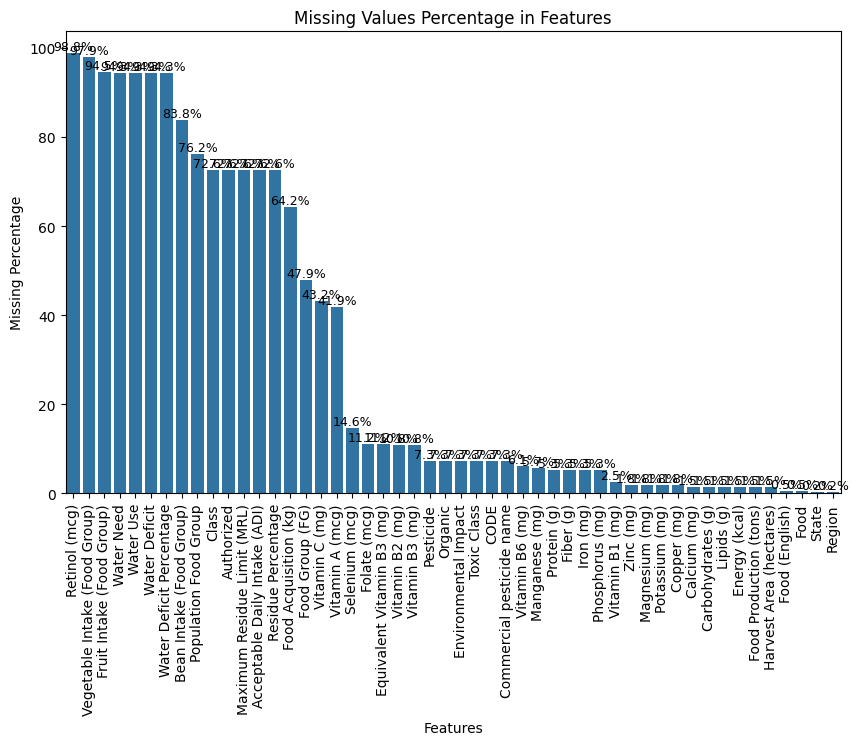

In [5]:
# Check for missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage in Features")

# Annotate the bars with percentages
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [6]:
# Calculate the percentage of missing values per column
missing_percent = df.isnull().sum() / len(df) * 100

# Drop columns where more than 50% of values are missing
df = df.loc[:, missing_percent <= 50]

# Check remaining columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  439299 non-null  int64  
 1   Year                        439299 non-null  int64  
 2   Food                        437103 non-null  object 
 3   Food (English)              437103 non-null  object 
 4   Region                      438273 non-null  object 
 5   State                       438273 non-null  object 
 6   Harvest Area (hectares)     432688 non-null  float64
 7   Food Production (tons)      432688 non-null  float64
 8   Energy (kcal)               432688 non-null  float64
 9   Protein (g)                 415804 non-null  float64
 10  Lipids (g)                  432688 non-null  float64
 11  Carbohydrates (g)           432688 non-null  float64
 12  Fiber (g)                   415804 non-null  float64
 13  Calcium (mg)  

In [7]:
# Display all column names
print(df.columns)


Index(['Unnamed: 0', 'Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class',
       'Environmental Impact', 'Food Group (FG)'],
      dtype='object')


In [8]:
# List of columns to drop
columns_to_drop = ["Unnamed: 0", "Year", "Region", "State", "Harvest Area (hectares)", "Food Production (tons)", "CODE", "Commercial pesticide name", "Pesticide","Organic", "Toxic Class","Environmental Impact", "Food (English)","Food Group (FG)"] 

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Food                        437103 non-null  object 
 1   Energy (kcal)               432688 non-null  float64
 2   Protein (g)                 415804 non-null  float64
 3   Lipids (g)                  432688 non-null  float64
 4   Carbohydrates (g)           432688 non-null  float64
 5   Fiber (g)                   415804 non-null  float64
 6   Calcium (mg)                432688 non-null  float64
 7   Magnesium (mg)              431178 non-null  float64
 8   Manganese (mg)              414294 non-null  float64
 9   Phosphorus (mg)             415804 non-null  float64
 10  Iron (mg)                   415804 non-null  float64
 11  Potassium (mg)              431178 non-null  float64
 12  Copper (mg)                 431178 non-null  float64
 13  Zinc (mg)     

In [9]:
# Fill numerical columns with mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical columns with mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



/var/folders/gt/k4wvbf2531s9j7dg3ybl8txc0000gn/T/ipykernel_54995/3353747294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/gt/k4wvbf2531s9j7dg3ybl8txc0000gn/T/ipykernel_54995/3353747294.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [10]:
# Select categorical columns dynamically
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check updated dataframe
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 82 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Energy (kcal)               439299 non-null  float64
 1   Protein (g)                 439299 non-null  float64
 2   Lipids (g)                  439299 non-null  float64
 3   Carbohydrates (g)           439299 non-null  float64
 4   Fiber (g)                   439299 non-null  float64
 5   Calcium (mg)                439299 non-null  float64
 6   Magnesium (mg)              439299 non-null  float64
 7   Manganese (mg)              439299 non-null  float64
 8   Phosphorus (mg)             439299 non-null  float64
 9   Iron (mg)                   439299 non-null  float64
 10  Potassium (mg)              439299 non-null  float64
 11  Copper (mg)                 439299 non-null  float64
 12  Zinc (mg)                   439299 non-null  float64
 13  Selenium (mcg)

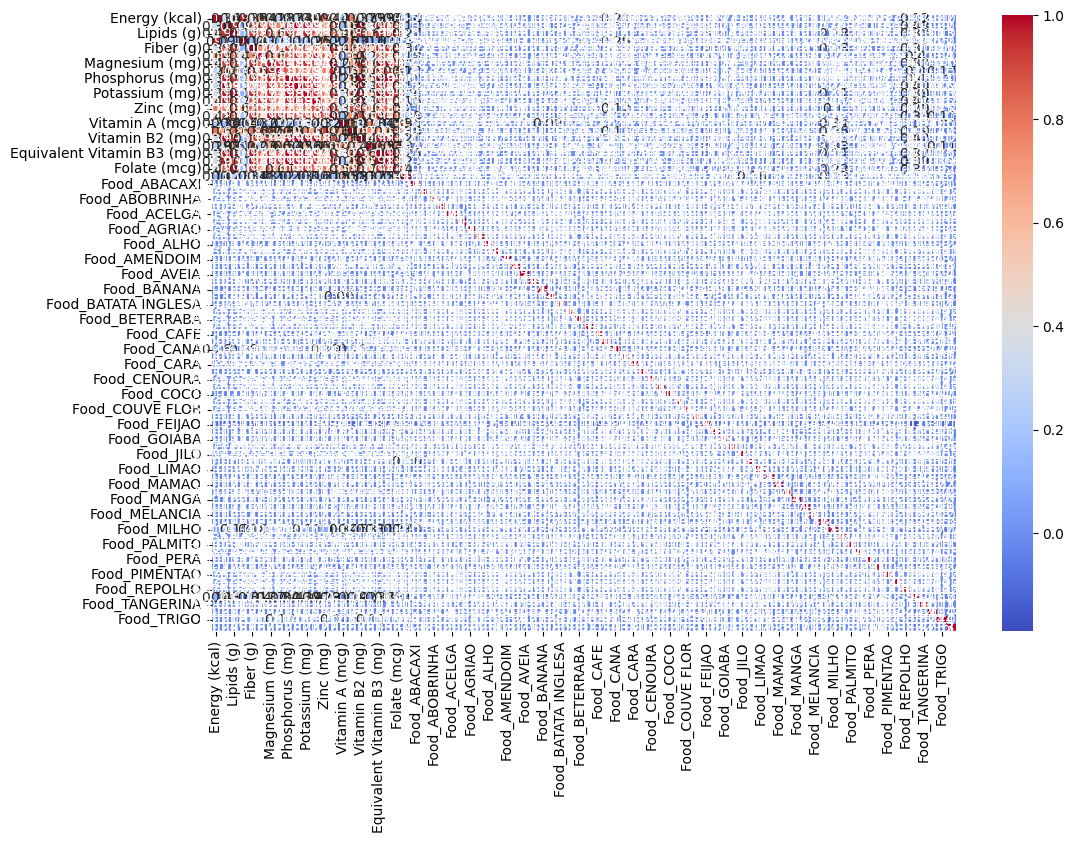

In [11]:
# Checking feature correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()



In [12]:
df["healthy"] = df["Energy (kcal)"] < 250  # Replace with correct column name
df["healthy"] = df["healthy"].astype(int)



In [18]:
# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +  # Protein is weighted higher
    df["Fiber (g)"] * 1.5 +  # Fiber is crucial
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -  # Unhealthy factors reduce the score
    df["Carbohydrates (g)"] * 0.5
)

# Classify foods as healthy if their health_score is above the 75th percentile
df["healthy"] = (df["health_score"] > df["health_score"].quantile(0.75)).astype(int)


In [ ]:
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)
#Foods above the median score → healthy = 1
#Foods below the median score → healthy = 0

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["health_score", "healthy"])  # Features
y = df["healthy"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (351439, 82)
Testing set size: (87860, 82)


In [21]:
# Feature scaling normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Accuracy: 0.9959
Precision: 0.9961
Recall: 0.9957
F1 Score: 0.9959


/Users/xavi/Desktop/ML 499/Food-Classification-Model/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


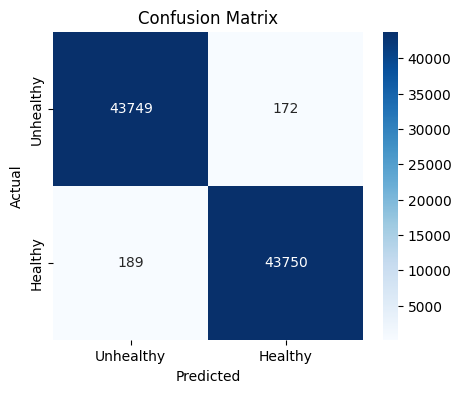

In [23]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Scores
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
